<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab05_srs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5: Hyperparameter Search
## Scott Spurlock
### 2/24/2021

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


In [19]:
# This a modified version of the video store data we've used before
# It has been modified to include a new column, incidentals, as a class label.
file_link = 'https://drive.google.com/uc?export=download&id=1izidngrqxWsq-1z-AgOcZIpF5F51CRQr'
df = pd.read_csv(file_link)
df.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
0,1,M,45000,25,32,2.5,Action,Yes
1,2,F,54000,33,12,3.4,Drama,No
2,3,F,32000,20,42,1.6,Comedy,No
3,4,F,59000,70,16,4.2,Drama,Yes
4,5,M,37000,35,25,3.2,Action,Yes


In [20]:
labels = df['Incidentals']
data = df[['Gender', 'Income', 'Age', 'Rentals', 'Avg Per Visit', 'Genre']]
numeric = pd.get_dummies(data)
numeric.head()

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
0,45000,25,32,2.5,0,1,1,0,0
1,54000,33,12,3.4,1,0,0,0,1
2,32000,20,42,1.6,1,0,0,1,0
3,59000,70,16,4.2,1,0,0,0,1
4,37000,35,25,3.2,0,1,1,0,0


In [21]:
norm = (numeric - numeric.min()) / (numeric.max() - numeric.min())
norm.head()

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
0,0.500000,0.181818,0.589744,0.388889,0.0,1.0,1.0,0.0,0.0
1,0.602273,0.327273,0.076923,0.638889,1.0,0.0,0.0,0.0,1.0
2,0.352273,0.090909,0.846154,0.138889,1.0,0.0,0.0,1.0,0.0
3,0.659091,1.000000,0.179487,0.861111,1.0,0.0,0.0,0.0,1.0
4,0.409091,0.363636,0.410256,0.583333,0.0,1.0,1.0,0.0,0.0


In [22]:
# Convert the data into a numpy array
X = norm
print('data:', X.shape)
print(X.head())

# Convert the class labels into numbers
y = labels
print('\nlabels:', y.shape)
y.head()

data: (50, 9)
     Income       Age   Rentals  ...  Genre_Action  Genre_Comedy  Genre_Drama
0  0.500000  0.181818  0.589744  ...           1.0           0.0          0.0
1  0.602273  0.327273  0.076923  ...           0.0           0.0          1.0
2  0.352273  0.090909  0.846154  ...           0.0           1.0          0.0
3  0.659091  1.000000  0.179487  ...           0.0           0.0          1.0
4  0.409091  0.363636  0.410256  ...           1.0           0.0          0.0

[5 rows x 9 columns]

labels: (50,)


0    Yes
1     No
2     No
3    Yes
4    Yes
Name: Incidentals, dtype: object

In [23]:
# Split into train/test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
# Train a model
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [25]:
# Predict test data
ypred = model.predict(Xtest)

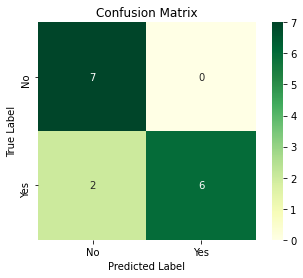

In [26]:
# Display confusion matrix
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="YlGn",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          No       0.78      1.00      0.88         7
         Yes       1.00      0.75      0.86         8

    accuracy                           0.87        15
   macro avg       0.89      0.88      0.87        15
weighted avg       0.90      0.87      0.87        15



In [28]:
# Precision for class 0
7 / (7 + 2)

0.7777777777777778

In [29]:
# Recall for class 0
7 / (7 + 0)

1.0

In [30]:
# Accuracy
(6 + 7) / (6 + 7 + 2 + 0)

0.8666666666666667

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21),
              'metric': ['euclidean', 'manhattan'],
              'weights': ['uniform', 'distance']}

model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
grid = GridSearchCV(model, param_grid, cv=5, verbose=0)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [33]:
model = grid.best_estimator_
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

          No       0.88      1.00      0.93         7
         Yes       1.00      0.88      0.93         8

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



Accuracy improves from 87% with the initial model (K = 1, Euclidean distance) to 93% with the final model (K = 1, Manhattan distance)

In [34]:
# What happens if we use the training data to test our model? I.e., use the
# trained model to make predictions about the training data.
ypred = model.predict(Xtrain)
print(classification_report(ytrain, ypred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        17
         Yes       1.00      1.00      1.00        18

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



Because we're using k = 1, if we make predictions on the training set, every example should have a perfectly matching neighbor (itself), which leads to 100% accuracy.